# Figure pour comparer durée des sous-titres

- durée sous-titre initial
- durée sous-titre phrase

In [2]:
import os
import re 
from datetime import datetime
import spacy
from datetime import datetime, timedelta
import shutil


In [3]:
def time_to_seconds(timestamp):
    # Split the timestamp into hours, minutes, seconds, and milliseconds
    milliseconds = int(timestamp.split('.')[1])
    tmp = timestamp.split('.')[0]
    hours, minutes, seconds = map(int, tmp.split(':'))

    # Calculate the total seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000.0

    return total_seconds

def time_to_milliseconds(timestamp):

    # Split the timestamp into hours, minutes, seconds, and milliseconds

    milliseconds = int(timestamp.split('.')[1])

    tmp = timestamp.split('.')[0]

    hours, minutes, seconds = map(int, tmp.split(':'))

    #seconds, milliseconds = map(int, seconds.split('.'))

     

    # Calculate the total milliseconds

    total_milliseconds = (hours * 3600 + minutes * 60 + seconds) * 1000 + milliseconds

    return total_milliseconds

def time_to_seconds(timestamp):
    # Split the timestamp into hours, minutes, seconds, and milliseconds
    milliseconds = int(timestamp.split('.')[1])
    tmp = timestamp.split('.')[0]
    hours, minutes, seconds = map(int, tmp.split(':'))

    # Calculate the total seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000.0

    return total_seconds


def lister_fichiers_with_path(dossier):
    path = dossier
    try:
        # Liste de tous les fichiers dans le dossier
        fichiers = [os.path.join(path,f) for f in os.listdir(dossier) if os.path.isfile(os.path.join(dossier, f))]
        return fichiers
    except Exception as e:
        print(f"Erreur lors de la récupération des fichiers : {e}")
        return None
    

def lister_fichiers(dossier):
    path = dossier
    try:
        # Liste de tous les fichiers dans le dossier
        fichiers = [f for f in os.listdir(dossier) if os.path.isfile(os.path.join(dossier, f))]
        return fichiers
    except Exception as e:
        print(f"Erreur lors de la récupération des fichiers : {e}")
        return None
    
def conv_str_to_time(temps_str):
    temps_format = "%H:%M:%S.%f"
    temps_obj = datetime.strptime(temps_str, temps_format)
    delta = timedelta(seconds=temps_obj.second, microseconds=temps_obj.microsecond)
    return delta


def ajouter_secondes(temps_str, secondes_a_ajouter):
    # Convertir la chaîne en objet datetime
    temps_format = "%H:%M:%S.%f"
    temps_obj = datetime.strptime(temps_str, temps_format)

    # Ajouter le nombre de secondes spécifié
    nouveau_temps_obj = temps_obj + timedelta(seconds=secondes_a_ajouter)

    # Formater le nouveau temps en chaîne avec une précision de 3 décimales
    nouveau_temps_str = nouveau_temps_obj.strftime("%H:%M:%S.%f")[:-3]

    return nouveau_temps_str

def convertir_grand_nombre(nombre_texte):
    nombre_sans_points = re.sub(r'(\d)\.(\d)', r'\1\2', nombre_texte)
    return nombre_sans_points

def remplacer_points_adresses_email(texte):
    # Expression régulière pour repérer les adresses e-mail
    pattern = r'\b[\w.%+-]+@[\w.-]+\.[a-zA-Z]{2,}\b'

    # Fonction de remplacement pour remplacer les points par "POINT"
    def remplacer(match):
        return match.group().replace('.', 'POINT')

    texte_modifie = re.sub(pattern, remplacer, texte)
    return texte_modifie


def get_dict_vtt(input):
    with open(input,encoding="utf-8") as f:
        lines = f.readlines()

    dict_sub = {}
    i = 0
    j = 0  

    while j < len(lines): 
        element = lines[j]
        if element.startswith("00:") or element.startswith("01:") or element.startswith("02:"):
            # Extraire le temps de début et de fin
            timing_line = element.strip().split(' --> ')
            start_time, end_time = timing_line

            text = ""
            while j + 1 < len(lines) and not lines[j + 1].startswith("00:") and not lines[j+1].startswith("01:") and not lines[j+1].startswith("02:"):
                j += 1
                content = lines[j]
                text = text + " " + content.strip()

            dict_sub[i] = {'start': start_time, 'end': end_time, 'text': text.strip()}
            i += 1

        j += 1

    return dict_sub

def create_vtt_file(dictionary, output_file_path):
    with open(output_file_path, 'w', encoding='utf-8') as file:
        file.write("WEBVTT\n\n")

        for key, v in dictionary.items():
            for kk,vv in v.items():
                if kk == 'start':
                    start_time = vv
                if kk == 'end':
                    end_time = vv
                if kk == 'text':
                    text = vv

            vtt_entry = f"{start_time} --> {end_time}\n{text}\n\n"
            file.write(vtt_entry)

def comparer_listes(liste1, liste2):
    differences = []

    # Détermine la longueur maximale entre les deux listes
    longueur_maximale = max(len(liste1), len(liste2))

    # Parcours des éléments jusqu'à la longueur maximale
    for i in range(longueur_maximale):
        # Détermine les éléments à comparer, en gérant les cas où les listes ont des longueurs différentes
        element_liste1 = liste1[i] if i < len(liste1) else None
        element_liste2 = liste2[i] if i < len(liste2) else None

        if element_liste1 != element_liste2:
            # Ajoute la position et les éléments qui diffèrent à la liste des différences
            differences.append((i, element_liste1, element_liste2))

    return differences


def get_sentences(input):
    sentences = []
    with open(input, encoding="utf-8") as f:
        line = f.readline()
        while line:
            sentences.append(line.strip())
            line = f.readline()
    return sentences



def convertir_chaine_en_temps(temps_str:str)-> datetime:
    # Formatter la chaîne de caractères en timedelta
    temps_delta = datetime.strptime(temps_str, "%H:%M:%S.%f")

    # Extraire l'heure, les minutes, les secondes et les microsecondes
    heures, minutes, secondes = temps_delta.hour, temps_delta.minute, temps_delta.second
    microsecondes = temps_delta.microsecond

    # Formater la sortie pour afficher uniquement l'heure, les minutes, les secondes et les millisecondes
    temps_formate = f"{heures:02d}:{minutes:02d}:{secondes:02d}.{microsecondes // 1000:03d}"

    return temps_formate


def deplacer_fichiers(chemins_source, dossier_destination):
    # Vérifier si le dossier de destination existe, sinon le créer
    if not os.path.exists(dossier_destination):
        print(f"Le dossier de destination '{dossier_destination}' n'existe pas. Création en cours...")
        os.makedirs(dossier_destination)

    # Boucler à travers les chemins de fichiers et les déplacer vers le dossier de destination
    for chemin_source in chemins_source:
        # Extraire le nom du fichier du chemin source
        nom_fichier = os.path.basename(chemin_source)
        chemin_destination = os.path.join(dossier_destination, nom_fichier)

        # Déplacer le fichier
        shutil.move(chemin_source, chemin_destination)
        print(f"Le fichier '{nom_fichier}' a été déplacé vers '{dossier_destination}'.")


In [4]:
# adapter les chemins vers les bonnes données

# fichiers sous-titres originaux

original_sub = lister_fichiers_with_path("../../../data/Matignon-LSFv1/subtitles/")

# fichiers sous-titres sentence based
sentence_based_sub = lister_fichiers_with_path("../../../data/donnees_V2.0.0.0/gold_test_sent_seg_cr/")

In [5]:
def get_dict_vtt(input):
    with open(input,encoding="utf-8") as f:
        lines = f.readlines()

    dict_sub = {}
    i = 0
    j = 0  

    while j < len(lines): 
        element = lines[j]
        if element.startswith("00:") or element.startswith("01:") or element.startswith("02:"):
            # Extraire le temps de début et de fin
            timing_line = element.strip().split(' --> ')
            start_time, end_time = timing_line

            text = ""
            while j + 1 < len(lines) and not lines[j + 1].startswith("00:") and not lines[j+1].startswith("01:") and not lines[j+1].startswith("02:"):
                j += 1
                content = lines[j]
                text = text + " " + content.strip()

            dict_sub[i] = {'start': start_time, 'end': end_time, 'text': text.strip()}
            i += 1

        j += 1

    return dict_sub

In [6]:
list_duration_subtitles = []
for file in sentence_based_sub:
    print(file)
    dict_sub = get_dict_vtt(file)
    for k,v in dict_sub.items():
        start_time = v["start"]
        end_time = v["end"]
        duration = time_to_seconds(end_time) - time_to_seconds(start_time)
        print(duration)
        list_duration_subtitles.append(duration)

../../../data/donnees_V2.0.0.0/gold_test_sent_seg_cr/8ZUIw7jcaZE.vtt
1.26
17.76
13.95
2.520000000000003
5.789999999999999
2.9399999999999977
5.969999999999999
6.509999999999998
4.560000000000009
3.7900000000000063
11.340000000000003
6.480000000000004
2.1599999999999966
6.8700000000000045
3.6700000000000017
8.590000000000003
12.510000000000005
10.650000000000006
3.5200000000000102
10.200000000000017
7.769999999999982
4.350000000000023
3.4799999999999898
11.139999999999986
6.359999999999985
8.72999999999999
8.789999999999992
27.360000000000014
6.390000000000015
10.740000000000009
7.77000000000001
5.970000000000027
4.860000000000014
6.960000000000036
7.470000000000027
5.159999999999968
4.7999999999999545
3.42999999999995
2.7600000000000477
9.480000000000018
7.980000000000018
1.670000000000016
12.840000000000032
13.70999999999998
4.140000000000043
13.260000000000048
5.730000000000018
1.740000000000009
6.5400000000000205
15.95999999999998
14.160000000000025
2.670000000000016
5.4200000000000

In [11]:
import json

list_duration_original_sub = []
for file in original_sub:
    with open(file,"r",encoding="utf-8") as f:
        dict_sub = json.load(f)
        for item in dict_sub:
            for k,v in item.items():
                if k == "duration":
                    list_duration_original_sub.append(v)

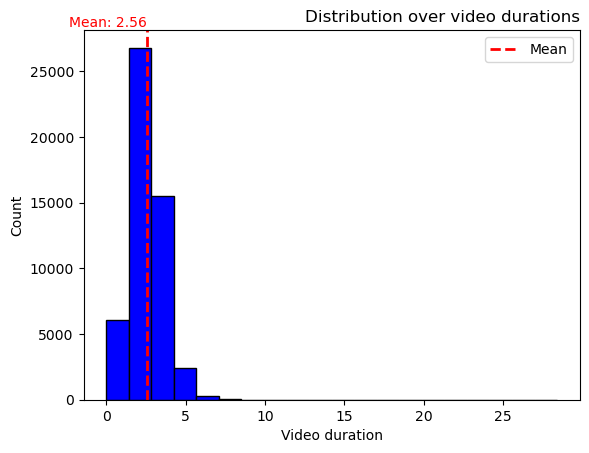

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que vous avez une liste de durées de vidéos en minutes
durees_videos = list_duration_original_sub

# Créer un histogramme
plt.hist(durees_videos, bins=20, color='blue', edgecolor='black')

# Calculer la valeur moyenne
moyenne = np.mean(durees_videos)

# Ajouter une ligne verticale pour représenter la valeur moyenne
plt.axvline(moyenne, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Ajouter la valeur moyenne en tant que texte
plt.text(moyenne, plt.ylim()[1], f'Mean: {moyenne:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')

# Ajouter des labels et un titre
plt.xlabel('Video duration')
plt.ylabel('Count')
plt.title('Distribution over video durations', loc="right")

# Ajouter une légende
plt.legend()


plt.savefig("distribution_over_video_durations.png")
# Afficher la figure
plt.show()

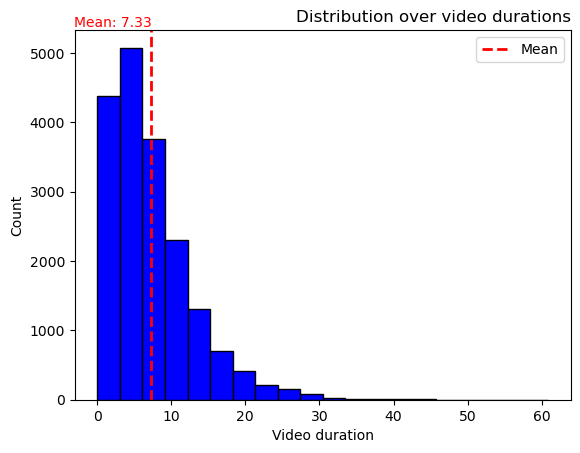

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que vous avez une liste de durées de vidéos en minutes
durees_videos = list_duration_subtitles

# Créer un histogramme
plt.hist(durees_videos, bins=20, color='blue', edgecolor='black')

# Calculer la valeur moyenne
moyenne = np.mean(durees_videos)

# Ajouter une ligne verticale pour représenter la valeur moyenne
plt.axvline(moyenne, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Ajouter la valeur moyenne en tant que texte
plt.text(moyenne, plt.ylim()[1], f'Mean: {moyenne:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')

# Ajouter des labels et un titre
plt.xlabel('Video duration')
plt.ylabel('Count')
plt.title('Distribution over video durations', loc="right")

# Ajouter une légende
plt.legend()


plt.savefig("distribution_over_video_durations.png")
# Afficher la figure
plt.show()